In [2]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm

%config InlineBackend.figure_format='retina'

In [7]:
abnormal_mu_list = ['1_1_2', '1_1_3', '1_2_2', '1_2_3', '2_2_2', '2_2_3', '3_3_1', '3_3_2', '3_3_3']
abnormal_mu_num_list = ['[1, 1, 2]', '[1, 1, 3]', '[1, 2, 2]', '[1, 2, 3]',
                        '[2, 2, 2]', '[2, 2, 3]', '[3, 3, 1]', '[3, 3, 2]', '[3, 3, 3]']

In [8]:
def gen_df(abnormal_mu):
    root = Path('./main/report/rec')

    semi_path = root / f'rec_[1_1_1]_[{abnormal_mu}]_[0.1]_[30]' / 'result_df_add.pkl'
    un_path = root / f'rec_unsupervised_[1_1_1]_[{abnormal_mu}]_[0.1]_[30]' / 'result_df_add.pkl'

    semi_df, un_df = pd.read_pickle(semi_path), pd.read_pickle(un_path)

    semi_df_0 = semi_df[semi_df.labels == 0]['scores']
    semi_df_1 = semi_df[semi_df.labels == 1]['scores']
    un_df_0 = un_df[un_df.labels == 0]['scores']
    un_df_1 = un_df[un_df.labels == 1]['scores']
    
    return un_df_0, un_df_1, semi_df_0, semi_df_1

In [9]:
def gen_df_dict(abnormal_mu_list):
    df_dict = {}
    
    for i, mu in enumerate(abnormal_mu_list):
        df_dict[i] = gen_df(mu)
    
    return df_dict

In [10]:
def gen_delta_dist(un_df_0, un_df_1, semi_df_0, semi_df_1, i, abnormal_mu_i):
    fig_, (ax3, ax4) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(18, 6))
    sea.distplot(un_df_0 - semi_df_0, hist=False, color='blue', label='delta(x): F_0(x) - F_0_tilde(x)', ax=ax3)
    sea.distplot(un_df_1 - semi_df_1, hist=False, color='sienna', label='delta(x): F_a(x) - F_a_tilde(x)', ax=ax4)

    ax3.set_title('[Normal] Distribution of Delta(x)')
    ax4.set_title('[Abnormal] Distribution of Delta(x)')
    ax3.set_ylabel('Number of Points')
    ax4.set_ylabel('Number of Points')
    plt.suptitle(f'Fig {i}. Mean of Gaussian Normal Data to Train: [1, 1, 1]\nMean of Gaussian Abnormal Data to Train: {abnormal_mu_i}\n')
    sea.despine()    

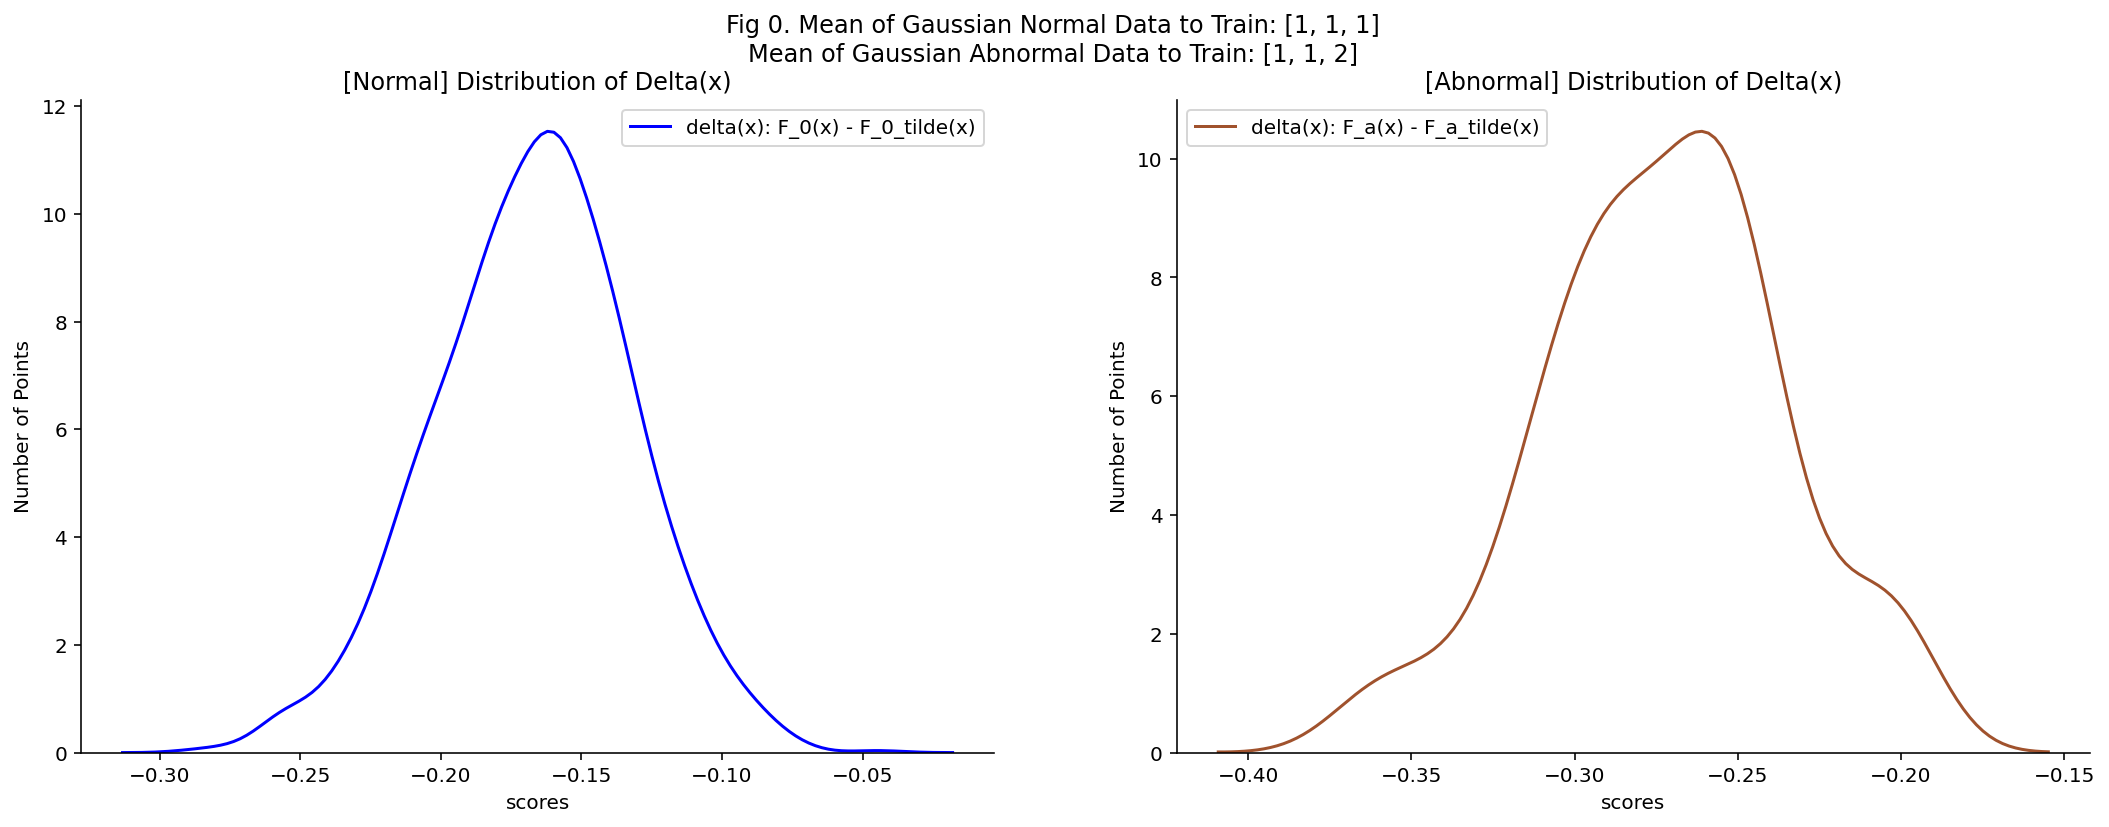

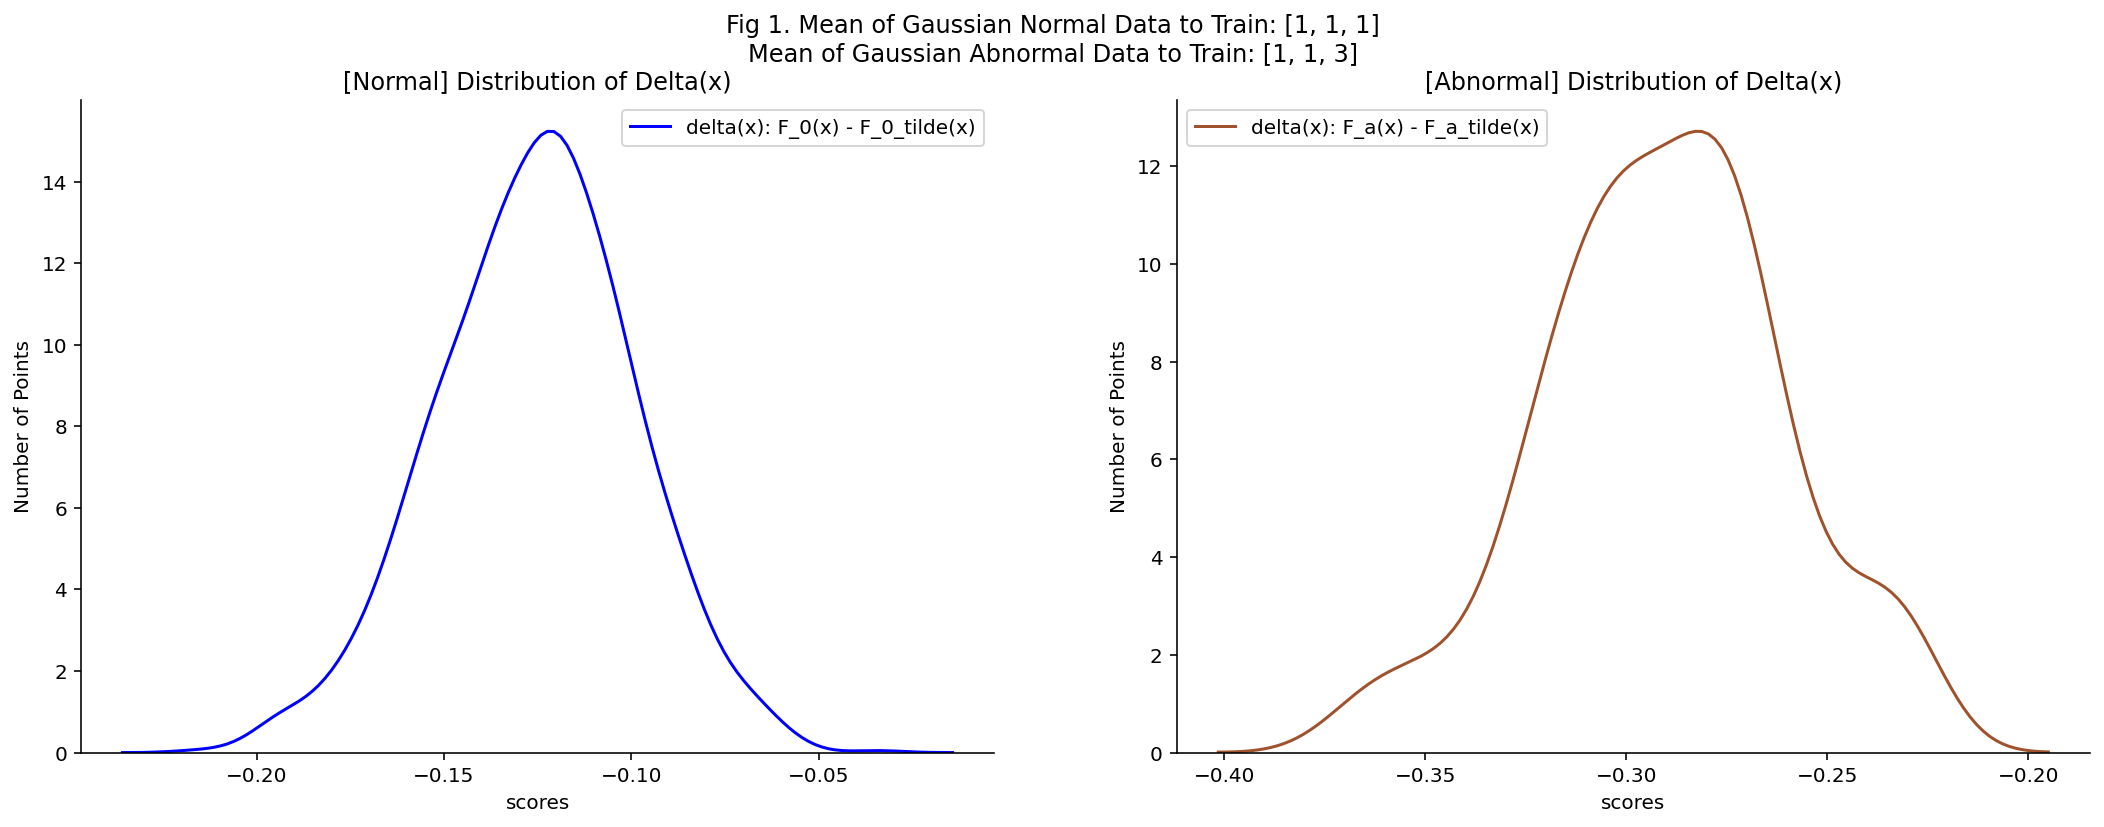

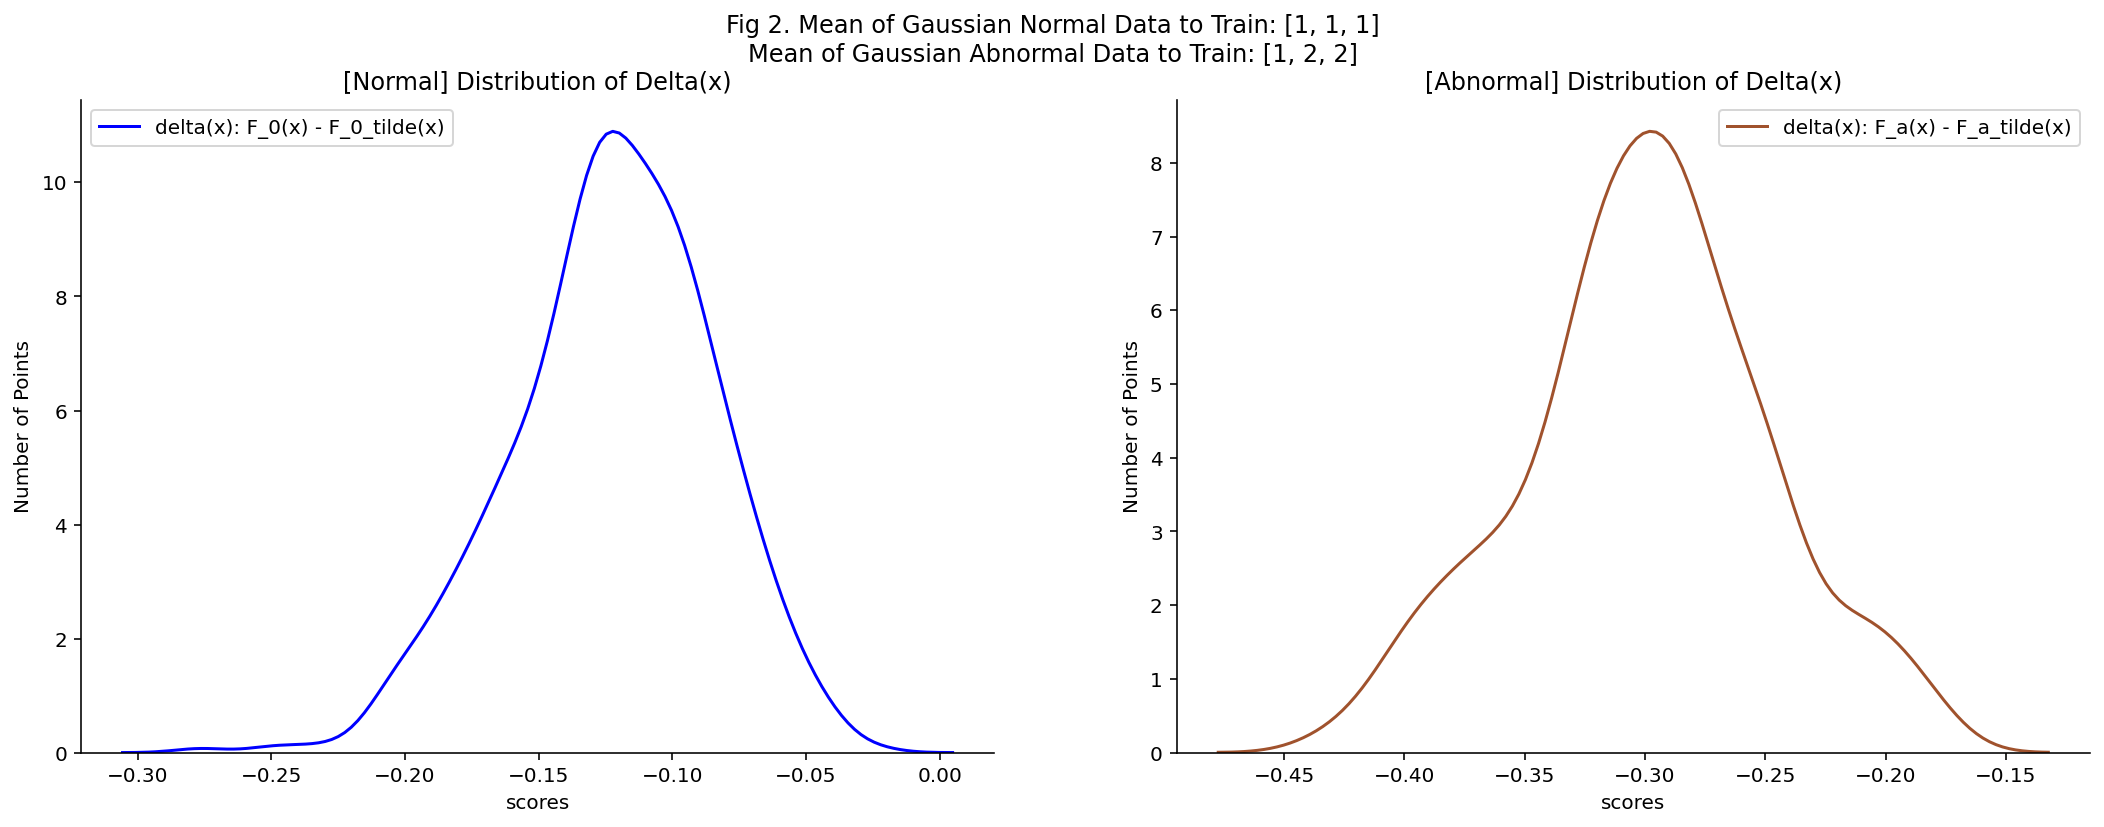

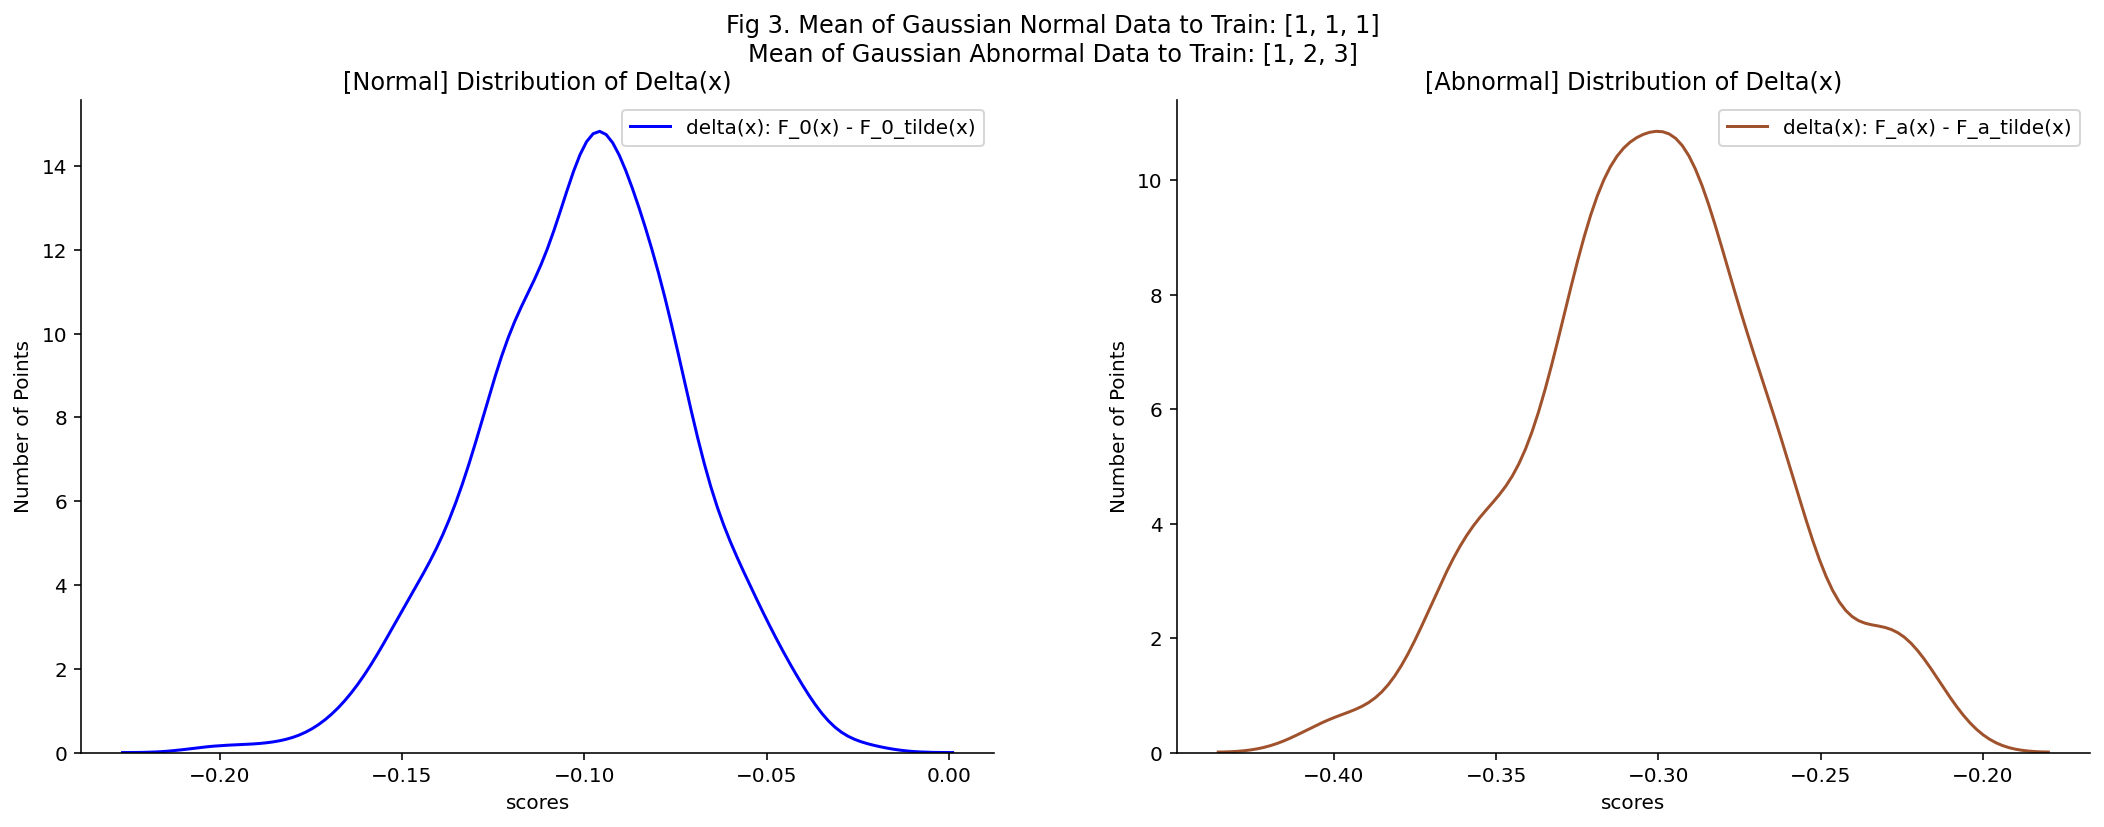

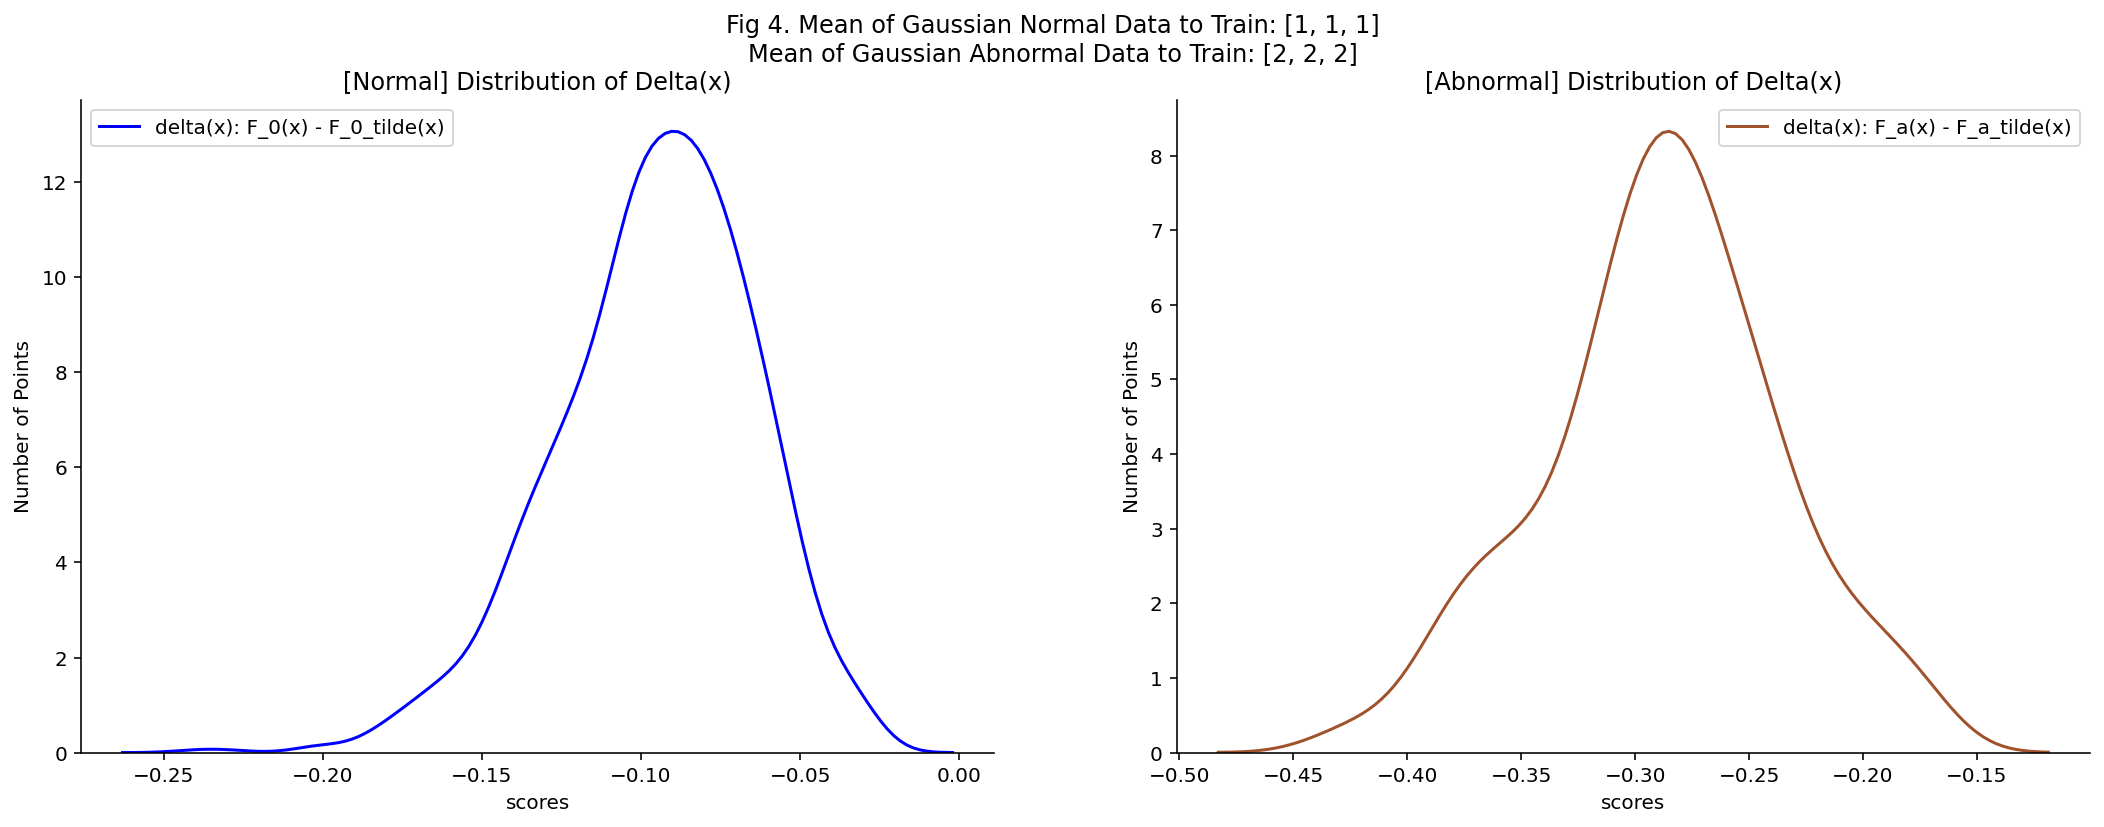

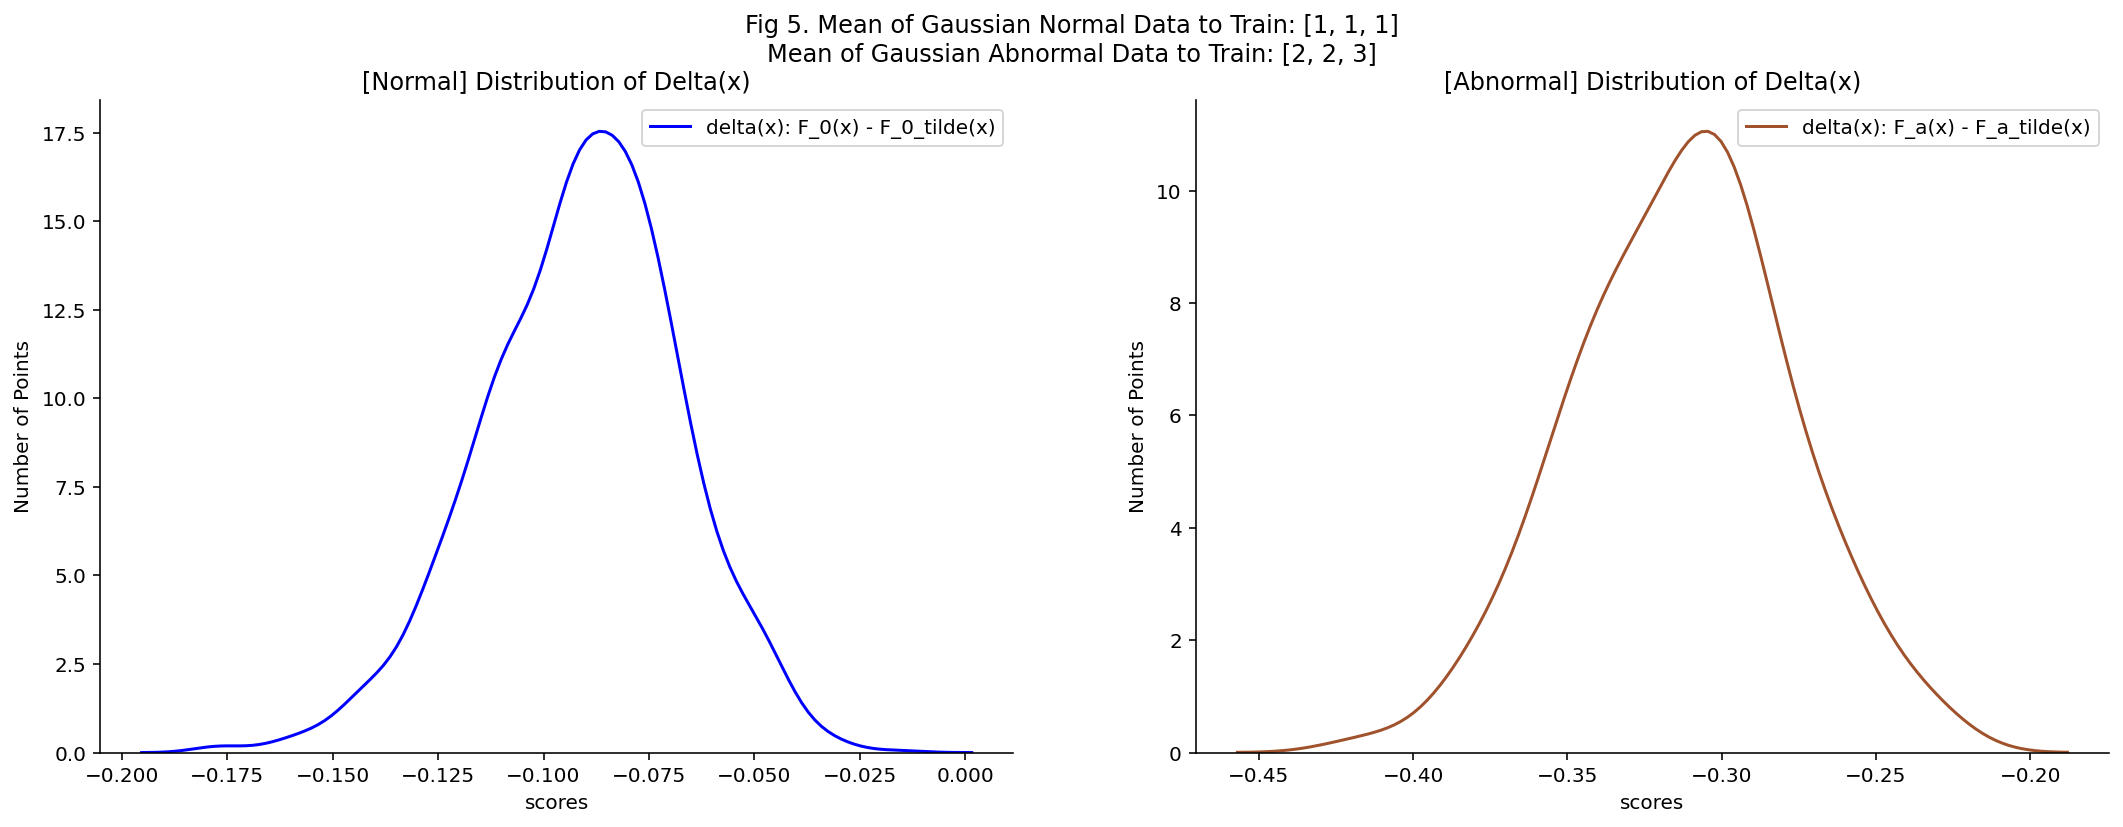

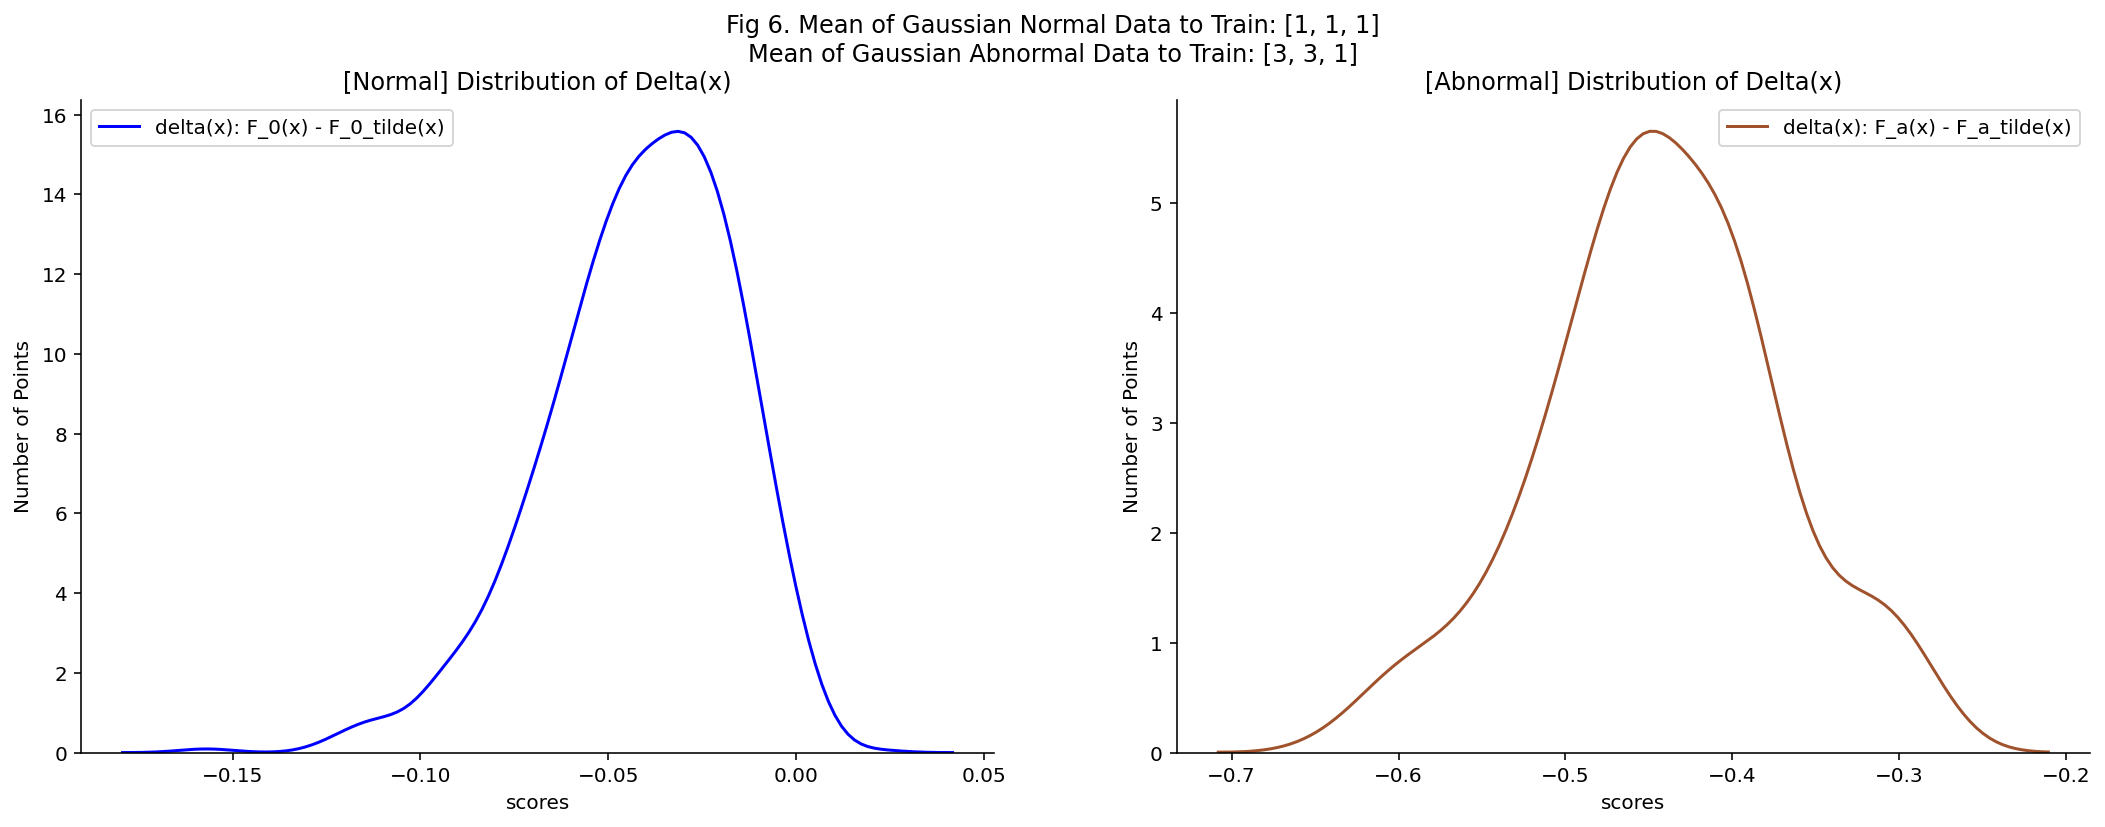

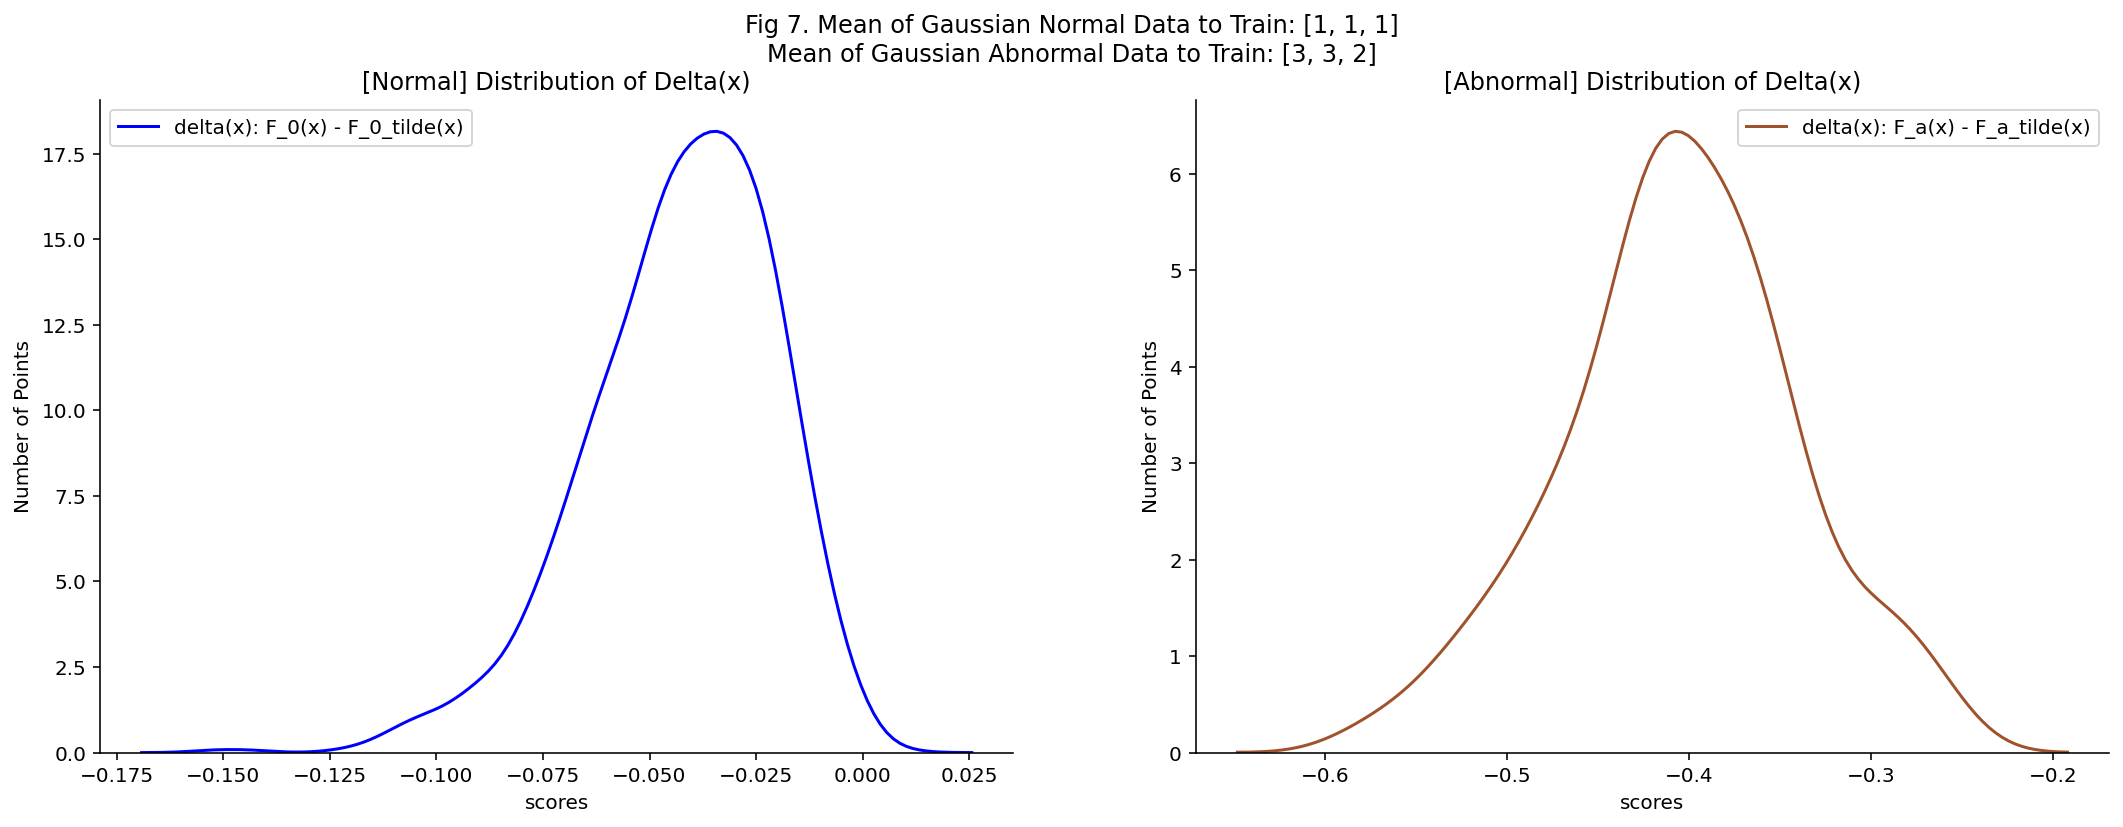

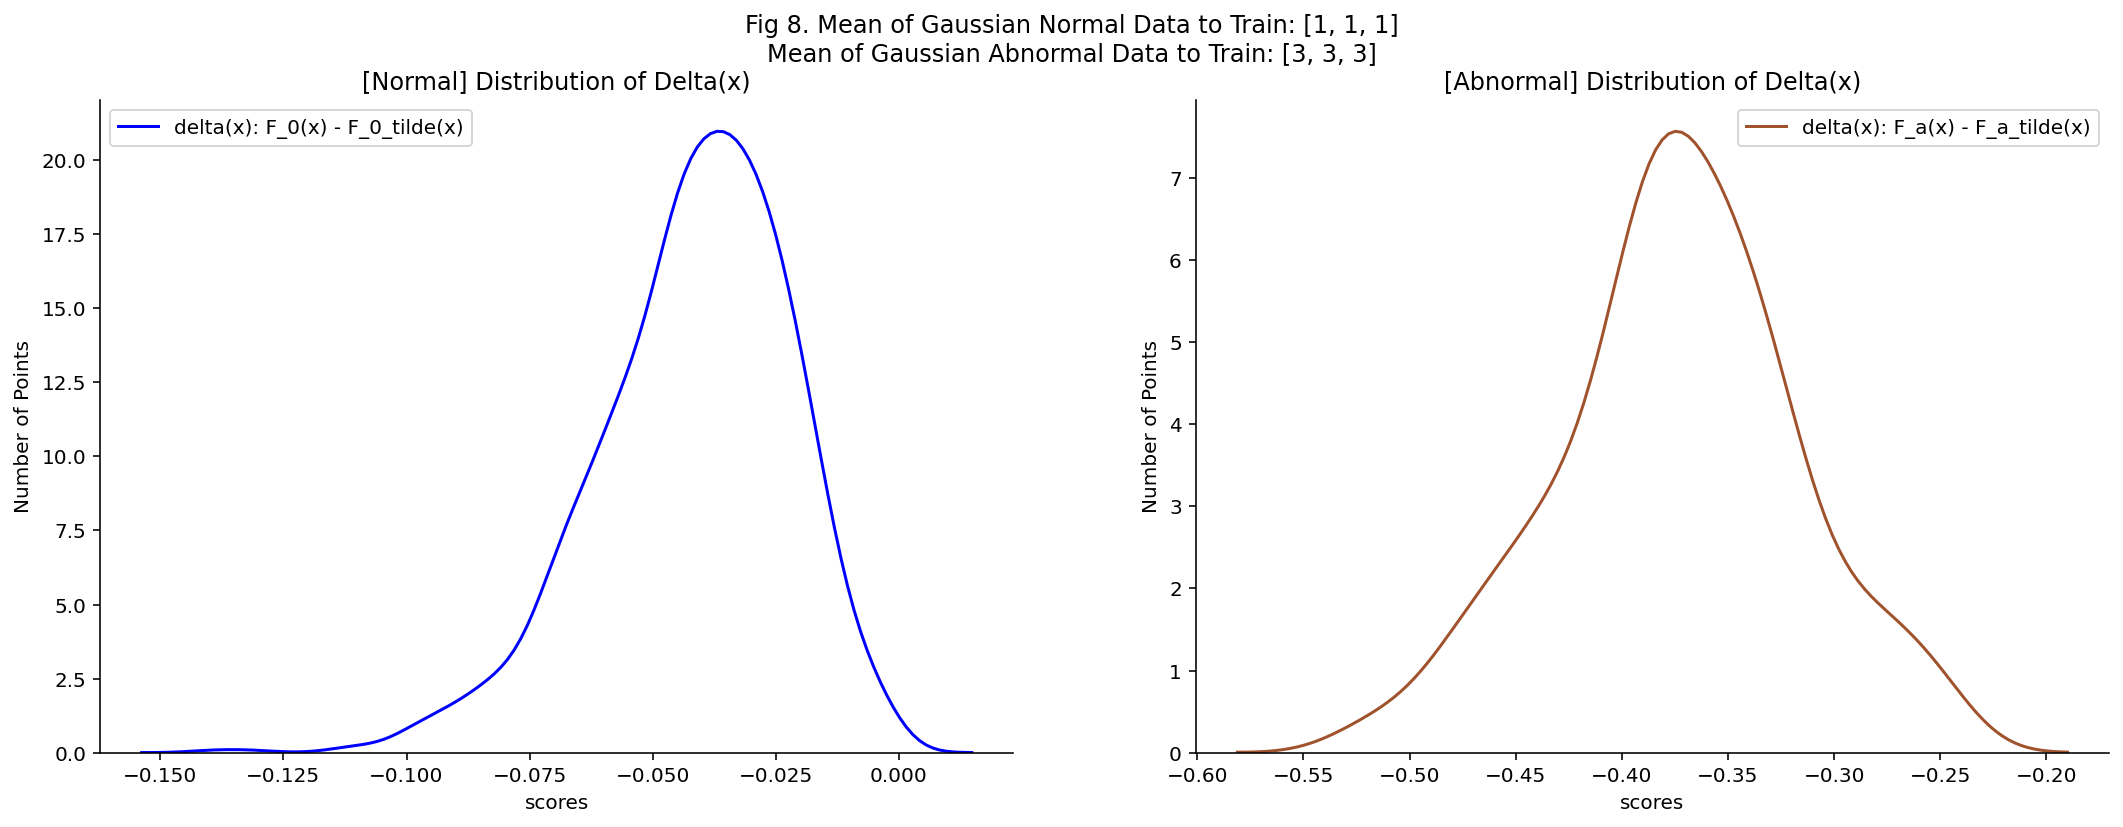

In [11]:
for i, _ in enumerate(abnormal_mu_list):
    df_dict = gen_df_dict(abnormal_mu_list)
    un_df_0, un_df_1, semi_df_0, semi_df_1 = df_dict[i]
    abnormal_mu_i = abnormal_mu_num_list[i]
    gen_delta_dist(un_df_0, un_df_1, semi_df_0, semi_df_1, i, abnormal_mu_i)